# Sandbox for testing purposes

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from cereeberus import EmbeddedGraph, ReebGraph
import cereeberus.data.ex_mappergraphs as ex_mg
# from cereeberus.data.ex_mergetrees import randomMergeTree

In [2]:

M = ex_mg.dancing_man()

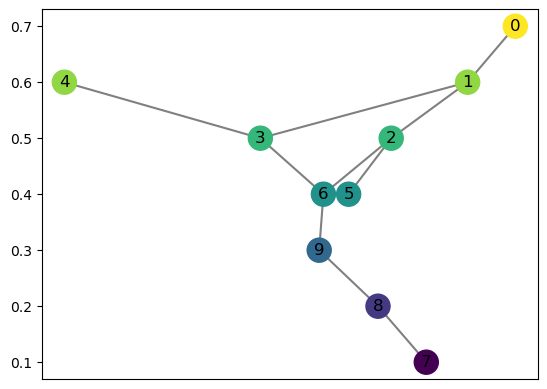

In [3]:
M.draw()

Edge count: 10
Matrix shape: (10, 10)


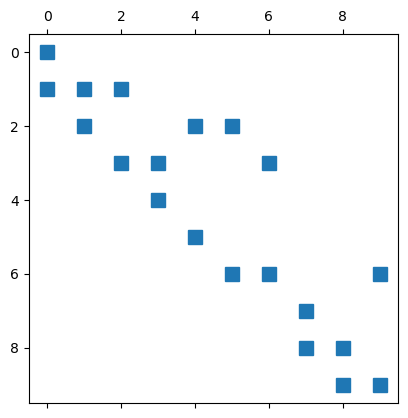

In [4]:
B = nx.linalg.graphmatrix.incidence_matrix(M, oriented = True)
print(f"Edge count: {len(M.edges())}")
print(f"Matrix shape: {B.shape}")
plt.spy(B)

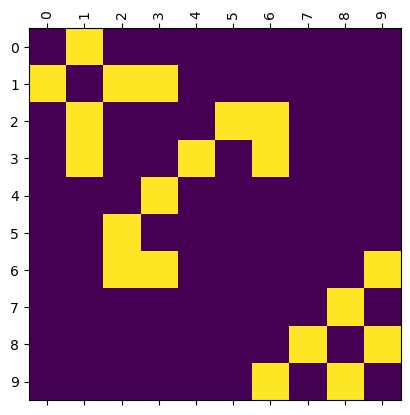

In [5]:
M.plot_adjacency_matrix()

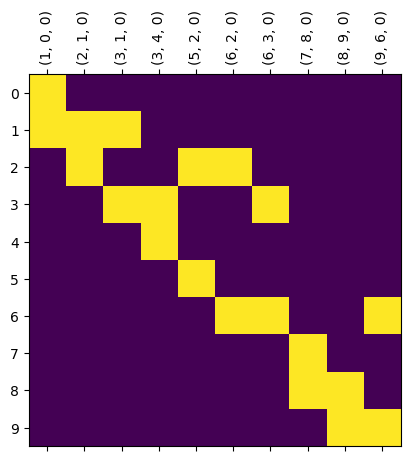

In [6]:
M.plot_boundary_matrix()

In [61]:
def boundary_matrix(G, as_type = 'array'):
    """
    Creates an boundary matrix for a given graph and node subset.

    Args:
        G (networkx.Graph): The graph.
        node_subset (list): A list of nodes representing the subset.

    Returns:
        numpy.ndarray: The boundary matrix.
    """

    V = list(G.nodes())
    E = list(G.edges())

    B = np.zeros((len(V), len(E)))

    for j, e in enumerate(E):
        i = V.index(e[0])
        B[i, j] = 1

        i = V.index(e[1])
        B[i, j] = -1

    if as_type == 'array':
        return B
    else: 
        B_df = pd.DataFrame(B, index = V, columns = E)
        return B_df

boundary_matrix(M, as_type='df')

(1, 0)  (2, 1)  (3, 1)  (3, 4)  (5, 2)  (6, 2)  (6, 3)  (7, 8)  (8, 9)  \
0    -1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     1.0    -1.0    -1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     1.0     0.0     0.0    -1.0    -1.0     0.0     0.0     0.0   
3     0.0     0.0     1.0     1.0     0.0     0.0    -1.0     0.0     0.0   
4     0.0     0.0     0.0    -1.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
6     0.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0     0.0   
7     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
8     0.0     0.0     0.0     0.0     0.0     0.0     0.0    -1.0     1.0   
9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    -1.0   

   (9, 6)  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
5     0.0  
6    -1.0  
7     0.0  
8     0.0  
9     1.0

In [44]:
list(M.edges())

[(1, 0),
 (2, 1),
 (3, 1),
 (3, 4),
 (5, 2),
 (6, 2),
 (6, 3),
 (7, 8),
 (8, 9),
 (9, 6)]

In [45]:
list(M.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]